In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
import seaborn as sns


In [2]:
def CorrlationLength2D(Array, thresh = 1./3.):

    # Compute the 2d Autocorrelation
    Autocorr = correlate2d(Array, Array, mode='full', boundary='wrap', fillvalue=0)
    
    # prepare the slices for the row and column with highest autocorr
    Maximum = np.max(Autocorr)
    N_1,N_2 = Array.shape # size of original array
    Index_Corr1, Index_Corr2 = np.unravel_index(Autocorr.argmax(),Autocorr.shape) # find maximum autocorr: centre

    Row_with_Maximum = Autocorr[Index_Corr1, # +/- ensures that size is equal to original Array
                                (Index_Corr2 - int(N_2/2)):(Index_Corr2 + int(N_2/2)) ]
    Column_with_Maximum = Autocorr[(Index_Corr1 - int(N_1/2)):(Index_Corr1 + int(N_1/2)),
                                  Index_Corr2]
    
    Corr_Length_Row = np.sum(Row_with_Maximum > thresh * Maximum)
    Corr_Length_Column = np.sum(Column_with_Maximum > thresh * Maximum)
    
    return([Corr_Length_Row, Corr_Length_Column])

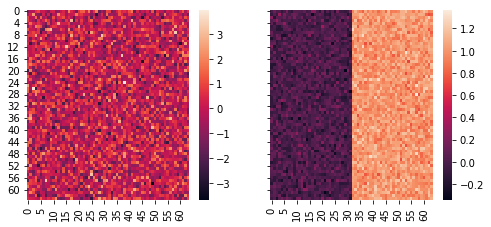

([1, 1], [43, 64])

In [3]:
N = 64
A_random = np.random.normal(0,1, (N,N))
A_regimes = np.random.normal(0,0.1, (N,N)) 
A_regimes[:, int(N/2):] += 1

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey = True,figsize = (8,3.5))
sns.heatmap(A_random, linewidth=0., ax = ax1)
sns.heatmap(A_regimes, linewidth=0.,ax=ax2)
plt.show()

CorrlationLength2D(A_random), CorrlationLength2D(A_regimes)

#### Less Trivial

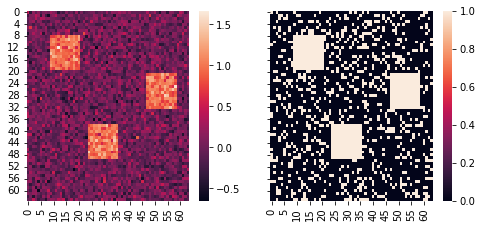

In [4]:
N1 = 64

A = np.random.normal(0,0.2, (N1,N1)) # Background
A[8:20, 9:21] += 1
A[38:50, 24:36] += 1
A[21:33, 47:59] += 1

A_bin = 1.*(A>=np.quantile(A,0.7))


fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey = True,figsize = (8,3.5))
sns.heatmap(A, linewidth=0., ax = ax1)
sns.heatmap(A_bin, linewidth=0.,ax=ax2)
plt.show()

### Actual Correlation Plots

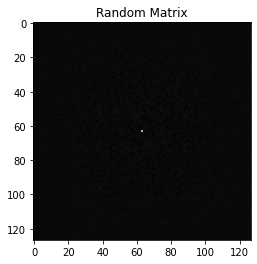

In [5]:
autocorr_random = correlate2d(A_random, A_random, mode='full', boundary='fill', fillvalue=0)
plt.imshow(autocorr_random, cmap='gray')
plt.title("Random Matrix")
plt.show()

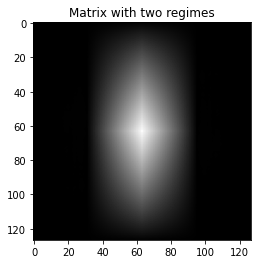

In [6]:
autocorr_regimes = correlate2d(A_regimes, A_regimes, mode='full', boundary='fill', fillvalue=0)
plt.imshow(autocorr_regimes, cmap='gray')
plt.title("Matrix with two regimes")
plt.show()

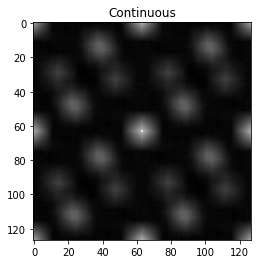

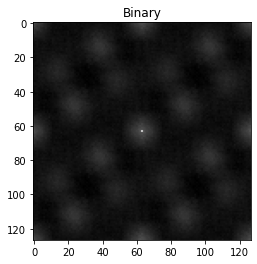

In [7]:
autocorr_cont = correlate2d(A, A, mode='full', boundary='wrap', fillvalue=0)
plt.imshow(autocorr_cont, cmap='gray')
plt.title("Continuous")
plt.show()

autocorr_binary = correlate2d(A_bin, A_bin, mode='full', boundary='wrap', fillvalue=0)
plt.imshow(autocorr_binary, cmap='gray')
plt.title("Binary")
plt.show()